# Homework 4: Optimization Algorithms - Real-World Applications

## Overview

This homework contains two real-world optimization case studies:

1. **Exercise 1**: Factory Production Scheduling (Genetic Algorithm)
2. **Exercise 2**: Warehouse Robot Positioning (Particle Swarm Optimization)

Each exercise has **3 TODO sections** where you need to complete the implementation.

## Instructions

1. Read each scenario carefully
2. Complete the 3 TODO sections in each exercise
3. Run all cells to verify your implementations
4. Submit your completed notebook

**Estimated time**: 2-3 hours

In [1]:
# Required imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from typing import List, Tuple, Dict
import random
from copy import deepcopy

np.random.seed(42)
random.seed(42)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


---

# Exercise 1: Factory Production Scheduling

## Scenario

**TechManufacturing Inc.** operates a factory with **4 production machines** that need to process **12 jobs** today. Each job has different processing times on each machine. The goal is to find the optimal assignment of jobs to machines that **minimizes the total completion time (makespan)**.

### Technical Details

**Machines**: M1, M2, M3, M4 (all available simultaneously)

**Jobs**: J1-J12 with different processing times per machine

**Processing Times** (in hours):

| Job | M1 | M2 | M3 | M4 |
|-----|----|----|----|----|
| J1  | 3  | 5  | 4  | 6  |
| J2  | 2  | 4  | 3  | 5  |
| J3  | 4  | 6  | 5  | 7  |
| J4  | 5  | 3  | 6  | 4  |
| J5  | 3  | 7  | 4  | 5  |
| J6  | 6  | 4  | 5  | 3  |
| J7  | 2  | 5  | 3  | 6  |
| J8  | 4  | 3  | 7  | 5  |
| J9  | 5  | 6  | 4  | 3  |
| J10 | 3  | 4  | 5  | 6  |
| J11 | 6  | 5  | 3  | 4  |
| J12 | 4  | 6  | 5  | 7  |

### Your Tasks (3 TODOs)

1. **TODO 1**: Implement fitness function to calculate makespan
2. **TODO 2**: Implement crossover operation for genetic algorithm
3. **TODO 3**: Complete visualization of the best schedule

## Step 1: Define Problem Data

In [2]:
# Processing times: processing_times[job_id][machine_id]
processing_times = np.array([
    [3, 5, 4, 6],  # J1
    [2, 4, 3, 5],  # J2
    [4, 6, 5, 7],  # J3
    [5, 3, 6, 4],  # J4
    [3, 7, 4, 5],  # J5
    [6, 4, 5, 3],  # J6
    [2, 5, 3, 6],  # J7
    [4, 3, 7, 5],  # J8
    [5, 6, 4, 3],  # J9
    [3, 4, 5, 6],  # J10
    [6, 5, 3, 4],  # J11
    [4, 6, 5, 7],  # J12
])

NUM_JOBS = len(processing_times)
NUM_MACHINES = len(processing_times[0])

job_names = [f'J{i+1}' for i in range(NUM_JOBS)]
machine_names = [f'M{i+1}' for i in range(NUM_MACHINES)]

print(f"Factory Configuration:")
print(f"  Machines: {NUM_MACHINES}")
print(f"  Jobs to schedule: {NUM_JOBS}")
print(f"  Total work hours: {processing_times.sum()}")
print(f"  Average per machine (if balanced): {processing_times.sum() / NUM_MACHINES:.1f} hours")

Factory Configuration:
  Machines: 4
  Jobs to schedule: 12
  Total work hours: 220
  Average per machine (if balanced): 55.0 hours


## Step 2: Implement Fitness Function

In [36]:
def calculate_makespan(schedule: np.ndarray, processing_times: np.ndarray) -> float:
    """
    Calculate makespan (total completion time) for a schedule.
    
    Args:
        schedule: Array where schedule[job_id] = machine_id
        processing_times: Matrix of processing times [job_id][machine_id]
    
    Returns:
        makespan: Maximum completion time across all machines
    """
    
    # ============================================================
    # TODO 1: Implement makespan calculation
    # ============================================================
    # HINT: Makespan is the maximum total time across all machines
    # Steps:
    #   1. Create array machine_times of size NUM_MACHINES, initialized to 0
    #   2. For each job_id from 0 to NUM_JOBS-1:
    #        - Get the assigned machine: machine_id = schedule[job_id]
    #        - Get processing time: time = processing_times[job_id][machine_id]
    #        - Add time to machine_times[machine_id]
    #   3. Return the maximum value in machine_times (this is the makespan)
    # ============================================================
    
    # Your code here
    #times for each machine
    times = np.zeros(NUM_MACHINES)
    # Iterate over all jobs by their index (job_id)
    for job_id in range(len(schedule)):
        # schedule[job_id] = machine_i
        times[schedule[job_id]]+=processing_times[job_id][schedule[job_id]]
    return max(times)
# Test with a simple schedule
test_schedule = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])  # Assign 3 jobs to each machine
test_makespan = calculate_makespan(test_schedule, processing_times)
print(f"Test schedule makespan: {test_makespan if test_makespan else 'Not implemented yet'}")

Test schedule makespan: 17.0


## Step 3: Implement Genetic Algorithm Operations

In [7]:
def create_individual() -> np.ndarray:
    """Create a random schedule (chromosome)."""
    return np.random.randint(0, NUM_MACHINES, size=NUM_JOBS)

def create_population(size: int) -> List[np.ndarray]:
    """Create initial population of random schedules."""
    return [create_individual() for _ in range(size)]

def selection(population: List[np.ndarray], fitness_scores: List[float], k: int = 3) -> np.ndarray:
    """Tournament selection: select best from k random individuals."""
    tournament = random.sample(list(zip(population, fitness_scores)), k)
    return min(tournament, key=lambda x: x[1])[0].copy()

def crossover(parent1: np.ndarray, parent2: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Single-point crossover: create two offspring from two parents.
    """
    
    # ============================================================
    # TODO 2: Implement single-point crossover
    # ============================================================
    # HINT: Single-point crossover swaps genetic material at a random point
    # Steps:
    #   1. Choose random crossover point: point = random.randint(1, NUM_JOBS - 1)
    #   2. Create offspring1 by combining:
    #        - parent1[0:point] (first part from parent1)
    #        - parent2[point:] (second part from parent2)
    #      Use: offspring1 = np.concatenate([parent1[:point], parent2[point:]])
    #   3. Create offspring2 by combining:
    #        - parent2[0:point] (first part from parent2)
    #        - parent1[point:] (second part from parent1)
    #   4. Return (offspring1, offspring2)
    # ============================================================
    
    # Your code here
    cut_point =  random.randint(1, NUM_JOBS - 1)
    # first and second part of parent1
    first_part_p1 = parent1[0:cut_point]
    second_part_p1 = parent1[cut_point:]
    # parent2
    first_part_p2 = parent2[0:cut_point]
    second_part_p2 = parent2[cut_point:]
    offspring1 = np.concatenate([first_part_p1, second_part_p2])    
    offspring2 = np.concatenate([first_part_p2, second_part_p1])
    return  (offspring1, offspring2)


def mutate(individual: np.ndarray, mutation_rate: float = 0.1) -> np.ndarray:
    """Randomly change machine assignments with given probability."""
    mutated = individual.copy()
    for i in range(len(mutated)):
        if random.random() < mutation_rate:
            mutated[i] = random.randint(0, NUM_MACHINES - 1)
    return mutated

print("✓ Genetic algorithm operators defined")

✓ Genetic algorithm operators defined


## Step 4: Run Genetic Algorithm

In [8]:
def genetic_algorithm(processing_times: np.ndarray, 
                     population_size: int = 100,
                     generations: int = 100,
                     mutation_rate: float = 0.1) -> Tuple[np.ndarray, List[float], List[float]]:
    """
    Run genetic algorithm to find optimal schedule.
    
    Returns:
        best_schedule: Best schedule found
        best_fitness_history: Best fitness per generation
        avg_fitness_history: Average fitness per generation
    """
    
    # Initialize population
    population = create_population(population_size)
    
    best_fitness_history = []
    avg_fitness_history = []
    best_overall_schedule = None
    best_overall_fitness = float('inf')
    
    print("\nGenetic Algorithm Progress:")
    print("="*60)
    
    for gen in range(generations):
        # Calculate fitness for all individuals
        fitness_scores = [calculate_makespan(ind, processing_times) for ind in population]
        
        # Track statistics
        best_fitness = min(fitness_scores)
        avg_fitness = np.mean(fitness_scores)
        best_fitness_history.append(best_fitness)
        avg_fitness_history.append(avg_fitness)
        
        # Update best overall
        if best_fitness < best_overall_fitness:
            best_overall_fitness = best_fitness
            best_overall_schedule = population[fitness_scores.index(best_fitness)].copy()
        
        # Print progress every 20 generations
        if gen % 20 == 0 or gen == generations - 1:
            print(f"Generation {gen:3d}: Best = {best_fitness:.1f}h, Avg = {avg_fitness:.1f}h")
        
        # Create new population
        new_population = []
        
        # Elitism: keep best individual
        best_idx = fitness_scores.index(best_fitness)
        new_population.append(population[best_idx].copy())
        
        # Generate offspring
        while len(new_population) < population_size:
            parent1 = selection(population, fitness_scores)
            parent2 = selection(population, fitness_scores)
            
            offspring1, offspring2 = crossover(parent1, parent2)
            
            offspring1 = mutate(offspring1, mutation_rate)
            offspring2 = mutate(offspring2, mutation_rate)
            
            new_population.append(offspring1)
            if len(new_population) < population_size:
                new_population.append(offspring2)
        
        population = new_population
    
    print("="*60)
    print(f"\n✓ Optimization complete!")
    print(f"  Best makespan: {best_overall_fitness:.1f} hours")
    
    return best_overall_schedule, best_fitness_history, avg_fitness_history

# Run the genetic algorithm
best_schedule, best_history, avg_history = genetic_algorithm(
    processing_times,
    population_size=100,
    generations=100,
    mutation_rate=0.15
)


Genetic Algorithm Progress:
Generation   0: Best = 15.0h, Avg = 23.2h
Generation  20: Best = 12.0h, Avg = 17.2h
Generation  40: Best = 11.0h, Avg = 18.2h
Generation  60: Best = 11.0h, Avg = 17.1h
Generation  80: Best = 11.0h, Avg = 17.1h
Generation  99: Best = 11.0h, Avg = 16.5h

✓ Optimization complete!
  Best makespan: 11.0 hours


## Step 5: Analyze Results

In [9]:
# Calculate machine loads
machine_loads = np.zeros(NUM_MACHINES)
machine_jobs = {i: [] for i in range(NUM_MACHINES)}

for job_id, machine_id in enumerate(best_schedule):
    time = processing_times[job_id][machine_id]
    machine_loads[machine_id] += time
    machine_jobs[machine_id].append((job_names[job_id], time))

print("\n" + "="*60)
print("OPTIMAL PRODUCTION SCHEDULE")
print("="*60)

for machine_id in range(NUM_MACHINES):
    print(f"\n{machine_names[machine_id]}: {machine_loads[machine_id]:.0f} hours")
    jobs_str = ", ".join([f"{job}({time}h)" for job, time in machine_jobs[machine_id]])
    print(f"  Jobs: {jobs_str}")

makespan = machine_loads.max()
avg_load = machine_loads.mean()
load_balance = (1 - (machine_loads.std() / avg_load)) * 100

print(f"\n{'='*60}")
print("PERFORMANCE METRICS")
print("="*60)
print(f"Makespan (completion time): {makespan:.1f} hours")
print(f"Average machine load: {avg_load:.1f} hours")
print(f"Load balance: {load_balance:.1f}%")
print(f"\nTheoretical minimum: {processing_times.sum() / NUM_MACHINES:.1f} hours (perfect balance)")
print(f"Efficiency: {(processing_times.sum() / NUM_MACHINES / makespan * 100):.1f}%")


OPTIMAL PRODUCTION SCHEDULE

M1: 11 hours
  Jobs: J2(2h), J3(4h), J5(3h), J7(2h)

M2: 10 hours
  Jobs: J4(3h), J8(3h), J10(4h)

M3: 9 hours
  Jobs: J1(4h), J12(5h)

M4: 10 hours
  Jobs: J6(3h), J9(3h), J11(4h)

PERFORMANCE METRICS
Makespan (completion time): 11.0 hours
Average machine load: 10.0 hours
Load balance: 92.9%

Theoretical minimum: 55.0 hours (perfect balance)
Efficiency: 500.0%


## Step 6: Visualization

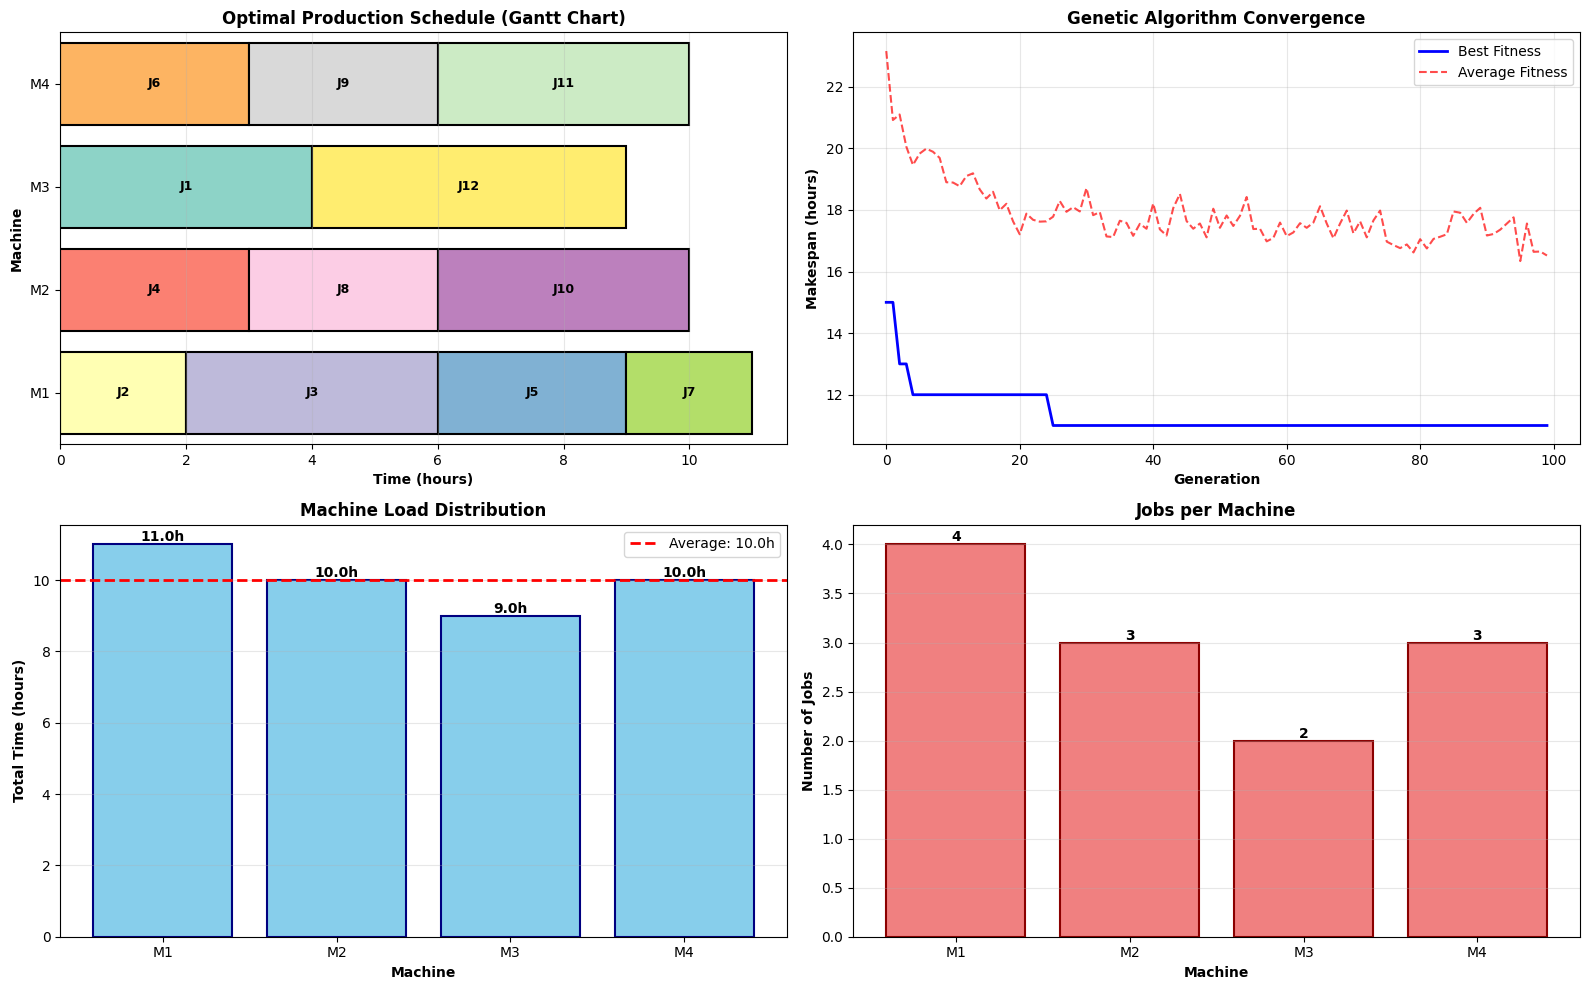

In [18]:
def visualize_schedule(schedule: np.ndarray, processing_times: np.ndarray,
                      best_history: List[float], avg_history: List[float]):
    """
    Visualize the production schedule and optimization progress.
    """
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))
    
    # ============================================================
    # TODO 3: Complete the Gantt chart visualization
    # ============================================================
    # HINT: Create a Gantt chart showing job scheduling on machines
    # Steps for ax1 (top-left):
    #   1. Set title: 'Optimal Production Schedule (Gantt Chart)'
    #   2. For each machine_id from 0 to NUM_MACHINES-1:
    #        - Initialize current_time = 0
    #        - For each job_id where schedule[job_id] == machine_id:
    #           * Get processing time: duration = processing_times[job_id][machine_id]
    #           * Create rectangle: patches.Rectangle((current_time, machine_id - 0.4),
    #                                                   duration, 0.8, ...)
    #           * Add to ax1: ax1.add_patch(rect)
    #           * Add job label at center: ax1.text(current_time + duration/2, machine_id, job_names[job_id], ...)
    #           * Update: current_time += duration
    #   3. Set y-axis: ax1.set_yticks(range(NUM_MACHINES))
    #               ax1.set_yticklabels(machine_names)
    #   4. Set labels and grid
    # ============================================================
    
    # Top-left: Gantt Chart
    ax1.set_title('Optimal Production Schedule (Gantt Chart)', fontsize=12, fontweight='bold')
    
    colors = plt.cm.Set3(np.linspace(0, 1, NUM_JOBS))
    
    # Your code here to create the Gantt chart
    # Creazione del Gantt chart
    max_time = 0  # Per tracciare il tempo massimo

    for machine_id in range(NUM_MACHINES):
        current_time = 0
        
        # Per ogni job assegnato a questa macchina
        for job_id in range(NUM_JOBS):
            if schedule[job_id] == machine_id:
                # Ottieni il tempo di processing
                duration = processing_times[job_id][machine_id]
                
                # Crea il rettangolo per il job
                rect = patches.Rectangle(
                    (current_time, machine_id - 0.4),
                    duration, 
                    0.8,
                    facecolor=colors[job_id],
                    edgecolor='black',
                    linewidth=1.5
                )
                
                # Aggiungi il rettangolo al grafico
                ax1.add_patch(rect)
                
                # Aggiungi l'etichetta del job al centro del rettangolo
                ax1.text(
                    current_time + duration/2, 
                    machine_id,
                    job_names[job_id],
                    ha='center',
                    va='center',
                    fontweight='bold',
                    fontsize=9
                )
                
                # Aggiorna il tempo corrente
                current_time += duration
        
        # Aggiorna il tempo massimo
        max_time = max(max_time, current_time)

    # Imposta i limiti degli assi
    ax1.set_xlim(0, max_time * 1.05)  # Aggiungi un po' di margine
    ax1.set_ylim(-0.5, NUM_MACHINES - 0.5)

    # Imposta l'asse y con i nomi delle macchine
    ax1.set_yticks(range(NUM_MACHINES))
    ax1.set_yticklabels(machine_names)

    # Imposta le etichette degli assi
    ax1.set_xlabel('Time (hours)', fontweight='bold')
    ax1.set_ylabel('Machine', fontweight='bold')
    ax1.grid(True, alpha=0.3, axis='x')
       

    
    # Top-right: Evolution of fitness
    ax2.set_title('Genetic Algorithm Convergence', fontsize=12, fontweight='bold')
    generations = range(len(best_history))
    ax2.plot(generations, best_history, 'b-', linewidth=2, label='Best Fitness')
    ax2.plot(generations, avg_history, 'r--', linewidth=1.5, label='Average Fitness', alpha=0.7)
    ax2.set_xlabel('Generation', fontweight='bold')
    ax2.set_ylabel('Makespan (hours)', fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Bottom-left: Machine load distribution
    ax3.set_title('Machine Load Distribution', fontsize=12, fontweight='bold')
    machine_loads = np.zeros(NUM_MACHINES)
    for job_id, machine_id in enumerate(schedule):
        machine_loads[machine_id] += processing_times[job_id][machine_id]
    
    bars = ax3.bar(machine_names, machine_loads, color='skyblue', edgecolor='navy', linewidth=1.5)
    ax3.axhline(y=machine_loads.mean(), color='r', linestyle='--', 
                linewidth=2, label=f'Average: {machine_loads.mean():.1f}h')
    ax3.set_ylabel('Total Time (hours)', fontweight='bold')
    ax3.set_xlabel('Machine', fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')
    
    # Add values on bars
    for bar, load in zip(bars, machine_loads):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{load:.1f}h', ha='center', va='bottom', fontweight='bold')
    
    # Bottom-right: Job distribution per machine
    ax4.set_title('Jobs per Machine', fontsize=12, fontweight='bold')
    jobs_per_machine = np.bincount(schedule, minlength=NUM_MACHINES)
    bars = ax4.bar(machine_names, jobs_per_machine, color='lightcoral', 
                   edgecolor='darkred', linewidth=1.5)
    ax4.set_ylabel('Number of Jobs', fontweight='bold')
    ax4.set_xlabel('Machine', fontweight='bold')
    ax4.grid(True, alpha=0.3, axis='y')
    
    # Add values on bars
    for bar, count in zip(bars, jobs_per_machine):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(count)}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()


# Create visualization
visualize_schedule(best_schedule, processing_times, best_history, avg_history)

## Exercise 1 Summary

You have successfully:
- Implemented a fitness function for production scheduling
- Applied genetic algorithm with crossover and mutation
- Optimized job assignments to minimize makespan
- Visualized the production schedule and algorithm convergence

---

# Exercise 2: Warehouse Robot Positioning

## Scenario

**LogisTech Warehouse** operates a large distribution center with **5 charging stations** for robots positioned at fixed locations. They need to deploy **5 mobile robots** at optimal positions to minimize the total distance from robots to their assigned charging stations.

### Technical Details

**Warehouse**: 100m × 100m area

**Charging Stations** (fixed positions in meters):
- Station 1: (20, 20)
- Station 2: (80, 20)
- Station 3: (50, 50)
- Station 4: (20, 80)
- Station 5: (80, 80)

**Robots**: 5 robots that need to find optimal positions

**Objective**: Minimize total Euclidean distance from each robot to its nearest charging station

### Your Tasks (3 TODOs)

1. **TODO 1**: Implement fitness function (total distance calculation)
2. **TODO 2**: Implement velocity and position update for PSO
3. **TODO 3**: Complete the visualization showing particle convergence

## Step 1: Define Warehouse Setup

In [35]:
# Warehouse dimensions
WAREHOUSE_SIZE = 100

# Fixed charging station positions
charging_stations = np.array([
    [20, 20],
    [80, 20],
    [50, 50],
    [20, 80],
    [80, 80]
])

NUM_STATIONS = len(charging_stations)
NUM_ROBOTS = 5

print(f"Warehouse Configuration:")
print(f"  Size: {WAREHOUSE_SIZE}m × {WAREHOUSE_SIZE}m")
print(f"  Charging stations: {NUM_STATIONS}")
print(f"  Robots to position: {NUM_ROBOTS}")
print(f"\nCharging Station Locations:")
for i, (x, y) in enumerate(charging_stations):
    print(f"  Station {i+1}: ({x:.0f}, {y:.0f})")

Warehouse Configuration:
  Size: 100m × 100m
  Charging stations: 5
  Robots to position: 5

Charging Station Locations:
  Station 1: (20, 20)
  Station 2: (80, 20)
  Station 3: (50, 50)
  Station 4: (20, 80)
  Station 5: (80, 80)


## Step 2: Implement Fitness Function

In [30]:
def calculate_total_distance(robot_positions: np.ndarray, stations: np.ndarray) -> float:
    """
    Calculate total minimum distance from each robot to nearest charging station.
    
    Args:
        robot_positions: Array of shape (NUM_ROBOTS, 2) with robot positions
        stations: Array of shape (NUM_STATIONS, 2) with station positions
    
    Returns:
        total_distance: Sum of minimum distances
    """
    
    # ============================================================
    # TODO 1: Implement total distance calculation
    # ============================================================
    # HINT: For each robot, find the distance to its nearest charging station
    # Steps:
    #   1. Initialize total_distance = 0
    #   2. For each robot_pos in robot_positions:
    #        - Calculate distances to all stations:
    #          distances = np.sqrt(np.sum((stations - robot_pos)**2, axis=1))
    #        - Find minimum distance: min_dist = np.min(distances)
    #        - Add to total: total_distance += min_dist
    #   3. Return total_distance
    # ============================================================
    
    # Your code here
    total_distance = 0.0
    # for all robot 
    for r_pos in robot_positions:
        distances = np.sqrt(np.sum((stations - r_pos)**2, axis=1))
        min_distance = np.min(distances)
        total_distance += min_distance
    return total_distance

# Test with random positions
test_positions = np.random.uniform(0, WAREHOUSE_SIZE, (NUM_ROBOTS, 2))
test_distance = calculate_total_distance(test_positions, charging_stations)
print(f"Test distance: {test_distance if test_distance else 'Not implemented yet'}")

Test distance: 155.86281995006007


## Step 3: Implement PSO Algorithm

In [33]:
class Particle:
    """Represents a particle in PSO (a potential solution)."""
    
    def __init__(self, dimensions: int):
        # Position: random robot positions in warehouse
        self.position = np.random.uniform(0, WAREHOUSE_SIZE, dimensions)
        # Velocity: random initial velocity
        self.velocity = np.random.uniform(-5, 5, dimensions)
        # Personal best position
        self.best_position = self.position.copy()
        # Personal best fitness
        self.best_fitness = float('inf')

def particle_swarm_optimization(stations: np.ndarray,
                               num_particles: int = 30,
                               num_iterations: int = 100,
                               w: float = 0.7,
                               c1: float = 1.5,
                               c2: float = 1.5) -> Tuple[np.ndarray, List[float], List[np.ndarray]]:
    """
    Particle Swarm Optimization for robot positioning.
    
    Args:
        stations: Charging station positions
        num_particles: Number of particles in swarm
        num_iterations: Number of iterations
        w: Inertia weight
        c1: Cognitive parameter
        c2: Social parameter
    
    Returns:
        best_position: Best robot positions found
        best_fitness_history: Best fitness per iteration
        swarm_history: Swarm positions for visualization
    """
    
    dimensions = NUM_ROBOTS * 2  # 2D positions for each robot
    
    # Initialize swarm
    swarm = [Particle(dimensions) for _ in range(num_particles)]
    
    # Global best
    global_best_position = None
    global_best_fitness = float('inf')
    
    best_fitness_history = []
    swarm_history = []
    
    print("\nParticle Swarm Optimization Progress:")
    print("="*60)
    
    for iteration in range(num_iterations):
        
        # Evaluate fitness for all particles
        for particle in swarm:
            # Reshape position to (NUM_ROBOTS, 2)
            robot_positions = particle.position.reshape(NUM_ROBOTS, 2)
            fitness = calculate_total_distance(robot_positions, stations)
            
            # Update personal best
            if fitness < particle.best_fitness:
                particle.best_fitness = fitness
                particle.best_position = particle.position.copy()
            
            # Update global best
            if fitness < global_best_fitness:
                global_best_fitness = fitness
                global_best_position = particle.position.copy()
        
        best_fitness_history.append(global_best_fitness)
        
        # Store swarm positions for visualization (every 10 iterations)
        if iteration % 10 == 0:
            swarm_positions = np.array([p.position.reshape(NUM_ROBOTS, 2) for p in swarm])
            swarm_history.append(swarm_positions)
        
        # Print progress
        if iteration % 20 == 0 or iteration == num_iterations - 1:
            print(f"Iteration {iteration:3d}: Best fitness = {global_best_fitness:.2f}m")
        
        # ============================================================
        # TODO 2: Implement PSO velocity and position update
        # ============================================================
        # HINT: Update each particle's velocity and position
        # For each particle in swarm:
        #   1. Generate random factors:
        #        r1 = np.random.random(dimensions)
        #        r2 = np.random.random(dimensions)
        #   
        #   2. Update velocity using PSO formula:
        #        particle.velocity = (w * particle.velocity +
        #                           c1 * r1 * (particle.best_position - particle.position) +
        #                           c2 * r2 * (global_best_position - particle.position))
        #   
        #   3. Update position:
        #        particle.position = particle.position + particle.velocity
        #   
        #   4. Apply boundary constraints (keep robots in warehouse):
        #        particle.position = np.clip(particle.position, 0, WAREHOUSE_SIZE)
        # ============================================================
        
        # Your code here
        for particle in swarm:
            r1 = np.random.random(dimensions)
            r2 = np.random.random(dimensions)
            # compute components
            inertia = w*particle.velocity
            cognitive = c1*r1*(particle.best_position - particle.position)
            social = c2*r2*(global_best_position - particle.position)
            # update vel
            particle.velocity = inertia+cognitive+social
            # update pos
            particle.position = particle.position + particle.velocity
            # Apply boundary constraints (keep robots in warehouse):
            particle.position = np.clip(particle.position, 0, WAREHOUSE_SIZE)

    print("="*60)
    print(f"\n✓ Optimization complete!")
    print(f"  Best total distance: {global_best_fitness:.2f}m")
    print(f"  Average distance per robot: {global_best_fitness/NUM_ROBOTS:.2f}m")
    
    best_position = global_best_position.reshape(NUM_ROBOTS, 2)
    return best_position, best_fitness_history, swarm_history

# Run PSO
best_robot_positions, fitness_history, swarm_history = particle_swarm_optimization(
    charging_stations,
    num_particles=30,
    num_iterations=100,
    w=0.7,
    c1=1.5,
    c2=1.5
)


Particle Swarm Optimization Progress:
Iteration   0: Best fitness = 140.86m
Iteration  20: Best fitness = 80.04m
Iteration  40: Best fitness = 24.53m
Iteration  60: Best fitness = 10.56m
Iteration  80: Best fitness = 4.66m
Iteration  99: Best fitness = 2.07m

✓ Optimization complete!
  Best total distance: 2.07m
  Average distance per robot: 0.21m


## Step 4: Analyze Results

In [34]:
print("\n" + "="*60)
print("OPTIMAL ROBOT POSITIONS")
print("="*60)

# Find nearest station for each robot
for i, robot_pos in enumerate(best_robot_positions):
    distances = np.sqrt(np.sum((charging_stations - robot_pos)**2, axis=1))
    nearest_station = np.argmin(distances)
    min_distance = distances[nearest_station]
    
    print(f"\nRobot {i+1}: ({robot_pos[0]:.1f}, {robot_pos[1]:.1f})")
    print(f"  Nearest station: Station {nearest_station+1}")
    print(f"  Distance: {min_distance:.2f}m")

total_dist = calculate_total_distance(best_robot_positions, charging_stations)
avg_dist = total_dist / NUM_ROBOTS

print(f"\n{'='*60}")
print("PERFORMANCE METRICS")
print("="*60)
print(f"Total distance: {total_dist:.2f}m")
print(f"Average distance per robot: {avg_dist:.2f}m")

# Calculate initial random solution for comparison
initial_positions = np.random.uniform(0, WAREHOUSE_SIZE, (NUM_ROBOTS, 2))
initial_distance = calculate_total_distance(initial_positions, charging_stations)
improvement = ((initial_distance - total_dist) / initial_distance) * 100

print(f"\nRandom placement distance: {initial_distance:.2f}m")
print(f"Improvement: {improvement:.1f}%")


OPTIMAL ROBOT POSITIONS

Robot 1: (19.9, 80.2)
  Nearest station: Station 4
  Distance: 0.17m

Robot 2: (80.1, 80.0)
  Nearest station: Station 5
  Distance: 0.08m

Robot 3: (80.0, 20.0)
  Nearest station: Station 2
  Distance: 0.05m

Robot 4: (19.8, 80.1)
  Nearest station: Station 4
  Distance: 0.22m

Robot 5: (20.0, 80.0)
  Nearest station: Station 4
  Distance: 0.02m

Robot 6: (19.8, 20.0)
  Nearest station: Station 1
  Distance: 0.24m

Robot 7: (80.3, 20.3)
  Nearest station: Station 2
  Distance: 0.37m

Robot 8: (50.0, 50.0)
  Nearest station: Station 3
  Distance: 0.05m

Robot 9: (20.6, 79.9)
  Nearest station: Station 4
  Distance: 0.59m

Robot 10: (19.7, 80.1)
  Nearest station: Station 4
  Distance: 0.28m

PERFORMANCE METRICS
Total distance: 2.07m
Average distance per robot: 0.21m

Random placement distance: 149.79m
Improvement: 98.6%


## Step 5: Visualization

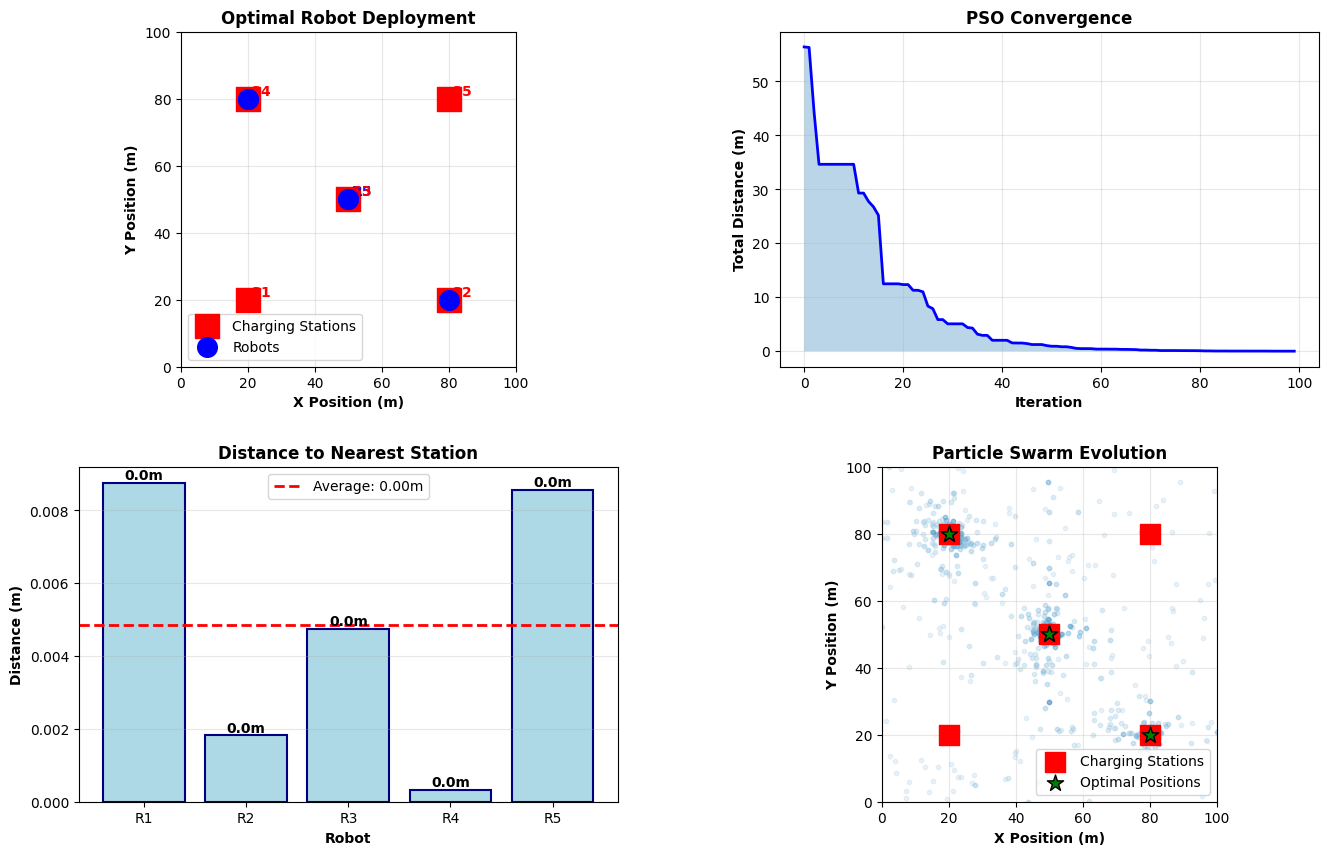

In [28]:
def visualize_robot_positioning(best_positions: np.ndarray,
                               stations: np.ndarray,
                               fitness_history: List[float],
                               swarm_history: List[np.ndarray]):
    """
    Visualize robot positioning optimization.
    """
    
    fig = plt.figure(figsize=(16, 10))
    gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)
    
    # ============================================================
    # TODO 3: Complete the warehouse layout visualization
    # ============================================================
    # HINT: Create warehouse map showing stations and optimal robot positions
    # For ax1 (top-left):
    #   1. Set title: 'Optimal Robot Deployment'
    #   2. Plot charging stations: ax1.scatter(stations[:, 0], stations[:, 1],
    #                                          color='red', s=300, marker='s', ...)
    #   3. Plot robot positions: ax1.scatter(best_positions[:, 0], best_positions[:, 1],
    #                                       color='blue', s=200, marker='o', ...)
    #   4. For each robot, draw a line to its nearest station:
    #        - Calculate distances to all stations
    #        - Find nearest: nearest_idx = np.argmin(distances)
    #        - Draw line: ax1.plot([robot_x, station_x], [robot_y, station_y], 'g--', alpha=0.5)
    #   5. Add labels for stations and robots
    #   6. Set axis limits: ax1.set_xlim(0, WAREHOUSE_SIZE)
    #                      ax1.set_ylim(0, WAREHOUSE_SIZE)
    #   7. Add grid and legend
    # ============================================================
    
    # Top-left: Warehouse layout
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.set_title('Optimal Robot Deployment', fontsize=12, fontweight='bold')
    
    # Your code here to create the warehouse visualization
    # stations plot
    ax1.scatter(stations[:, 0], stations[:, 1],
            color='red', s=300, marker='s', label='Charging Stations', zorder=3)
    # robot plot
    ax1.scatter(best_positions[:, 0], best_positions[:, 1],
            color='blue', s=200, marker='o', label='Robots', zorder=4)
    # line
    for i, robot_pos in enumerate(best_positions):
        # distance to all stations
        distances = np.sqrt(np.sum((stations - robot_pos)**2, axis=1))
        nearest_idx = np.argmin(distances)
        
        # coor. of the nearest station
        station_pos = stations[nearest_idx]
        
        # linea
        ax1.plot([robot_pos[0], station_pos[0]],
                [robot_pos[1], station_pos[1]],
                'g--', alpha=0.5)
        
    # label
    ax1.text(robot_pos[0]+1, robot_pos[1]+1, f'R{i+1}', color='blue', fontweight='bold')
    for i, (x, y) in enumerate(stations):
        ax1.text(x+1, y+1, f'S{i+1}', color='red', fontweight='bold')
    ax1.set_xlim(0, WAREHOUSE_SIZE)
    ax1.set_ylim(0, WAREHOUSE_SIZE)
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')
    ax1.legend()




    
    ax1.set_xlabel('X Position (m)', fontweight='bold')
    ax1.set_ylabel('Y Position (m)', fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')
    
    # Top-right: Fitness convergence
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.set_title('PSO Convergence', fontsize=12, fontweight='bold')
    iterations = range(len(fitness_history))
    ax2.plot(iterations, fitness_history, 'b-', linewidth=2)
    ax2.set_xlabel('Iteration', fontweight='bold')
    ax2.set_ylabel('Total Distance (m)', fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.fill_between(iterations, fitness_history, alpha=0.3)
    
    # Bottom-left: Distance distribution
    ax3 = fig.add_subplot(gs[1, 0])
    ax3.set_title('Distance to Nearest Station', fontsize=12, fontweight='bold')
    
    distances_to_nearest = []
    for robot_pos in best_positions:
        distances = np.sqrt(np.sum((stations - robot_pos)**2, axis=1))
        distances_to_nearest.append(np.min(distances))
    
    robot_labels = [f'R{i+1}' for i in range(NUM_ROBOTS)]
    bars = ax3.bar(robot_labels, distances_to_nearest, color='lightblue', 
                   edgecolor='navy', linewidth=1.5)
    ax3.axhline(y=np.mean(distances_to_nearest), color='r', linestyle='--',
                linewidth=2, label=f'Average: {np.mean(distances_to_nearest):.2f}m')
    ax3.set_ylabel('Distance (m)', fontweight='bold')
    ax3.set_xlabel('Robot', fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')
    
    for bar, dist in zip(bars, distances_to_nearest):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{dist:.1f}m', ha='center', va='bottom', fontweight='bold')
    
    # Bottom-right: Swarm evolution (show multiple snapshots)
    ax4 = fig.add_subplot(gs[1, 1])
    ax4.set_title('Particle Swarm Evolution', fontsize=12, fontweight='bold')
    
    # Plot charging stations
    ax4.scatter(stations[:, 0], stations[:, 1], color='red', s=200, 
               marker='s', label='Charging Stations', zorder=3)
    
    # Plot swarm at different iterations with different colors
    colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(swarm_history)))
    for i, swarm_positions in enumerate(swarm_history):
        # Flatten all particle positions
        all_positions = swarm_positions.reshape(-1, 2)
        alpha = 0.3 + (i / len(swarm_history)) * 0.4
        ax4.scatter(all_positions[:, 0], all_positions[:, 1], 
                   color=colors[i], s=10, alpha=alpha)
    
    # Plot final best positions
    ax4.scatter(best_positions[:, 0], best_positions[:, 1], 
               color='green', s=150, marker='*', 
               label='Optimal Positions', zorder=4, edgecolor='black', linewidth=1)
    
    ax4.set_xlabel('X Position (m)', fontweight='bold')
    ax4.set_ylabel('Y Position (m)', fontweight='bold')
    ax4.set_xlim(0, WAREHOUSE_SIZE)
    ax4.set_ylim(0, WAREHOUSE_SIZE)
    ax4.grid(True, alpha=0.3)
    ax4.legend()
    ax4.set_aspect('equal')
    
    plt.show()

# Create visualization
visualize_robot_positioning(best_robot_positions, charging_stations, 
                           fitness_history, swarm_history)

## Exercise 2 Summary

You have successfully:
- Implemented a fitness function for robot positioning
- Applied Particle Swarm Optimization (PSO) algorithm
- Optimized robot positions to minimize distances to charging stations
- Visualized the swarm behavior and convergence
- Achieved significant improvement over random placement

---

# Homework Complete!

## Key Takeaways

### Genetic Algorithm (GA)
- **Best for**: Discrete optimization, scheduling, combinatorial problems
- **Key operations**: Selection, crossover, mutation
- **Strengths**: Good for complex search spaces, easy to parallelize

### Particle Swarm Optimization (PSO)
- **Best for**: Continuous optimization, positioning, parameter tuning
- **Key operations**: Velocity update, position update, swarm communication
- **Strengths**: Fast convergence, simple to implement, fewer parameters

## Comparison

| Aspect | Genetic Algorithm | Particle Swarm Optimization |
|--------|------------------|-----------------------------|
| **Solution representation** | Discrete/combinatorial | Continuous values |
| **Operators** | Crossover, mutation, selection | Velocity and position updates |
| **Communication** | Indirect (through selection) | Direct (global best) |
| **Convergence** | Slower but thorough | Faster but may converge prematurely |
| **Best use cases** | Scheduling, routing, packing | Positioning, parameter optimization |

Congratulations on completing Homework 4! 🎉